In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("train.csv")
df.shape

(42000, 785)

In [5]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
x = df.iloc[:,1:]
y = df['label']

In [7]:
x.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

<AxesSubplot:xlabel='label', ylabel='count'>

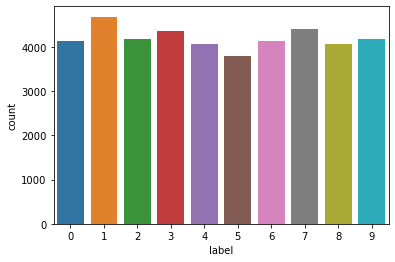

In [8]:
sns.countplot(data = df, x=y)

In [9]:
x.sample(1)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
40082       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
40082       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
40082         0         0         0         0         0  

[1 rows x 784 columns]

Text(0.5, 1.0, '6')

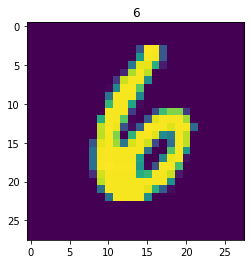

In [10]:
plt.imshow(x.iloc[40082,:].values.reshape(28,28))
plt.title(y[40082])

Text(0.5, 1.0, '3')

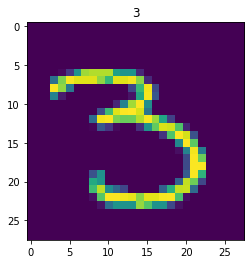

In [20]:
plt.imshow(x.iloc[5483,:].values.reshape(28,28))
plt.title(y[5483])

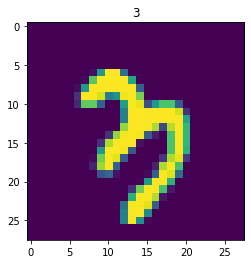

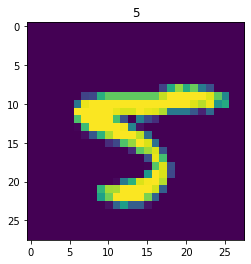

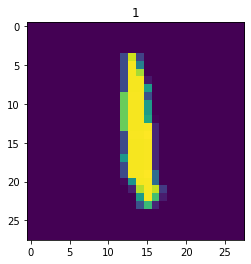

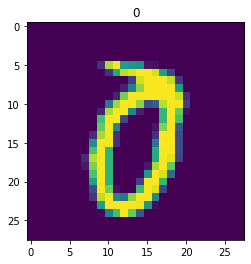

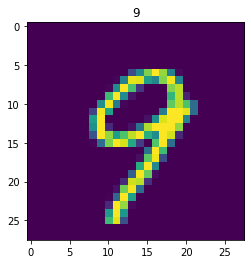

In [11]:
a = [4274,3583,209,1890,13898]
for i in a:
    plt.imshow(x.iloc[i,:].values.reshape(28,28))
    plt.title(y[i])
    plt.show()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [13]:
KNN = KNeighborsClassifier()

In [14]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [41]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [43]:
x_train_trf = std.fit_transform(x_train)
x_test_trf = std.transform(x_test)

In [53]:
from sklearn.decomposition import PCA
PCA = PCA(n_components = 100)

In [47]:
x_train_pca = PCA.fit_transform(x_train_trf)
x_test_pca = PCA.transform(x_test)

C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [48]:
x_test_pca.shape

(12600, 100)

In [50]:
KNN.fit(x_train_pca,y_train)
y_pred_pca = KNN.predict(x_test_pca)

In [51]:
accuracy_score(y_test,y_pred_pca)

0.7773809523809524

In [61]:
score = list()
for i in range(1,784):
    from sklearn.decomposition import PCA
    pca = PCA(n_components = i)
    x_train_pca = pca.fit_transform(x_train_trf)
    x_test_pca = pca.transform(x_test)
    KNN.fit(x_train_pca,y_train)
    y_pred_pca = KNN.predict(x_test_pca)
    score.append(accuracy_score(y_test,y_pred_pca))
print(max(score))

C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.p

C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.p

KeyboardInterrupt: 

In [62]:
import plotly.express as px

In [65]:
    from sklearn.decomposition import PCA
    pca = PCA(n_components = 2)
    x_train_pca = pca.fit_transform(x_train_trf)
    x_test_pca = pca.transform(x_test)
    KNN.fit(x_train_pca,y_train)
    y_pred_pca = KNN.predict(x_test_pca)
    accuracy_score(y_test,y_pred_pca)

C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names



0.1326984126984127

In [66]:
px.scatter(x_train_pca[:,0],x_train_pca[:,1],color=y_train)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_train_pca = pca.fit_transform(x_train_trf)
x_test_pca = pca.transform(x_test)
KNN.fit(x_train_pca,y_train)
y_pred_pca = KNN.predict(x_test_pca)
accuracy_score(y_test,y_pred_pca)
px.scatter_3d(x=x_train_pca[:,0],y=x_train_pca[:,1],z=x_train_pca[:,2],color=y_train.astype(str))

C:\Users\User27\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

